In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
winshares = pd.read_excel('winshares.xlsx', index_col=0)
winshares.head(5)

,Year,Player,Age,Tm,Pos,GP,GC,G/60,A/60,PTS/60,...,PTS,GC.1,TGF,PGF,TGA,PGA,+/-,OPS,DPS,PS
Rk,,,,,,,,,,,,,,,,,,,,,
1,2019/2020,Aaron Dell,30,SJS,G,33,0,0.00,0.00,0.00,...,0,0,72.0,13.0,89.0,14.0,0.0,0.0,0.0,5.3
2,2019/2020,Aaron Ekblad,23,FLA,D,67,12,0.07,0.54,0.61,...,49,15,88.0,11.0,91.0,25.0,12.0,2.7,3.5,6.2
3,2019/2020,Aaron Ness,29,ARI,D,24,0,0.00,0.04,0.04,...,1,0,13.0,0.0,13.0,0.0,1.0,-0.3,0.8,0.6
4,2019/2020,Adam Boqvist,19,CHI,D,41,5,0.10,0.22,0.32,...,16,6,36.0,7.0,33.0,0.0,-3.0,0.9,1.1,2.0
5,2019/2020,Adam Brooks,23,TOR,C,7,1,0.00,0.43,0.43,...,4,1,3.0,0.0,2.0,0.0,1.0,0.2,0.1,0.2


In [6]:
allgoaliews = winshares.loc[winshares['Pos'] == "G"]
allforwardws = winshares.loc[(winshares['Pos'] == "C") | (winshares['Pos'] == "LW") | (winshares['Pos'] == "RW")]
alldefencews = winshares.loc[winshares['Pos'] == "D"]

goalies = allgoaliews.Player.unique()
forwards = allforwardws.Player.unique()
defencemen = alldefencews.Player.unique()

In [7]:
poi = input("Choose an NHL player:")

poiws = winshares.loc[winshares['Player'] == str(poi)]
poiws = poiws.sort_values(by=['PS'], ascending=False)
poiws = poiws.reset_index()
poi_position = poiws['Pos'][0]

poiws = poiws[['Player', 'Age', 'PS']]

display(poiws)

poi_numseasons = poiws['Age'].count()

poi_careerval = 0
simscoreconst = 1
for season in poiws.index.values:
    poi_careerval += poiws["PS"][season] * simscoreconst
    simscoreconst -= 0.05

Choose an NHL player:Matthew Tkachuk


,Player,Age,PS
0,Matthew Tkachuk,21,8.8
1,Matthew Tkachuk,22,6.5
2,Matthew Tkachuk,20,5.6
3,Matthew Tkachuk,19,5.4


In [12]:
allplayersim = pd.DataFrame(columns=["playername", "simscore"])

if poi_position == "G":
    for skater in goalies:
        othws = allgoaliews.loc[allgoaliews['Player'] == str(skater)]
        othws = othws.drop_duplicates(subset='Year', keep="first")
        othws = othws.sort_values(by=['Age'], ascending=True)

        othws = othws[['Player', 'Age', 'PS']].head(poi_numseasons)
        othws = othws.sort_values(by=['PS'], ascending=False)
        othws = othws.reset_index()

        playername = othws['Player'][0]

        oth_careerval = 0
        simscoreconst = 1
        for season in poiws.index.values:
            if season in othws.index.values:
                oth_careerval += othws["PS"][season] * simscoreconst
            else:
                oth_careerval += 0
            simscoreconst -= 0.05
            if simscoreconst < 0:
                simscoreconst = 0

        if oth_careerval < 0:
            continue

        absvaldiff = pd.Series([], dtype="float64")
        for season in poiws.index.values:
            if season in othws.index.values:
                absvaldiff[season] = abs(poiws["PS"][season] - othws["PS"][season])
            else:
                absvaldiff[season] = poiws["PS"][season]

        penval = 0
        simscoreconst = 1
        for season in absvaldiff.index.values:
            penval += absvaldiff[season] * simscoreconst
            simscoreconst -= 0.05
            if simscoreconst < 0:
                simscoreconst = 0

        data = []
        simscore = 100 * (1 - ((2 * penval) / (poi_careerval + oth_careerval)))
        playersim = pd.DataFrame([[playername, simscore]], columns=["playername", "simscore"])

        allplayersim = allplayersim.append(playersim)

elif poi_position == "C" or poi_position == "LW" or poi_position == "RW":
    for skater in forwards:
        othws = allforwardws.loc[allforwardws['Player'] == str(skater)]
        othws = othws.drop_duplicates(subset='Year', keep="first")
        othws = othws.sort_values(by=['Age'], ascending=True)

        othws = othws[['Player', 'Age', 'PS']].head(poi_numseasons)
        othws = othws.sort_values(by=['PS'], ascending=False)
        othws = othws.reset_index()

        playername = othws['Player'][0]

        oth_careerval = 0
        simscoreconst = 1
        for season in poiws.index.values:
            if season in othws.index.values:
                oth_careerval += othws["PS"][season] * simscoreconst
            else:
                oth_careerval += 0
            simscoreconst -= 0.05
            if simscoreconst < 0:
                simscoreconst = 0

        if oth_careerval < 0:
            continue

        absvaldiff = pd.Series([], dtype="float64")
        for season in poiws.index.values:
            if season in othws.index.values:
                absvaldiff[season] = abs(poiws["PS"][season] - othws["PS"][season])
            else:
                absvaldiff[season] = poiws["PS"][season]

        penval = 0
        simscoreconst = 1
        for season in absvaldiff.index.values:
            penval += absvaldiff[season] * simscoreconst
            simscoreconst -= 0.05
            if simscoreconst < 0:
                simscoreconst = 0

        data = []
        simscore = 100 * (1 - ((2 * penval) / (poi_careerval + oth_careerval)))
        playersim = pd.DataFrame([[playername, simscore]], columns=["playername", "simscore"])

        allplayersim = allplayersim.append(playersim)

elif poi_position == "D":
    for skater in defencemen:
        othws = alldefencews.loc[alldefencews['Player'] == str(skater)]
        othws = othws.drop_duplicates(subset='Year', keep="first")
        othws = othws.sort_values(by=['Age'], ascending=True)

        othws = othws[['Player', 'Age', 'PS']].head(poi_numseasons)
        othws = othws.sort_values(by=['PS'], ascending=False)
        othws = othws.reset_index()

        playername = othws['Player'][0]

        oth_careerval = 0
        simscoreconst = 1
        for season in poiws.index.values:
            if season in othws.index.values:
                oth_careerval += othws["PS"][season] * simscoreconst
            else:
                oth_careerval += 0
            simscoreconst -= 0.05
            if simscoreconst < 0:
                simscoreconst = 0

        if oth_careerval < 0:
            continue

        absvaldiff = pd.Series([], dtype="float64")
        for season in poiws.index.values:
            if season in othws.index.values:
                absvaldiff[season] = abs(poiws["PS"][season] - othws["PS"][season])
            else:
                absvaldiff[season] = poiws["PS"][season]

        penval = 0
        simscoreconst = 1
        for season in absvaldiff.index.values:
            penval += absvaldiff[season] * simscoreconst
            simscoreconst -= 0.05
            if simscoreconst < 0:
                simscoreconst = 0

        data = []
        simscore = 100 * (1 - ((2 * penval) / (poi_careerval + oth_careerval)))
        playersim = pd.DataFrame([[playername, simscore]], columns=["playername", "simscore"])

        allplayersim = allplayersim.append(playersim)

In [13]:
allplayersim = allplayersim.sort_values(by=['simscore'], ascending=False)
allplayersim = allplayersim.iloc[1:]
allplayersim.head(15)

,playername,simscore
0,Stephane Richer,95.306677
0,Brendan Shanahan,93.830645
0,Mike Modano,93.053245
0,Dale Hawerchuk,92.890705
0,Brad Richards,92.715880
0,Dave Gagner,92.559912
0,Alex Zhamnov,92.516075
0,Taylor Hall,92.006443
0,Jack Eichel,90.970565
0,Sergei Samsonov,90.618019


In [14]:
simplayerps = pd.DataFrame(columns=["Rk", "Year", "Player", "Age", "PS"])

for player in allplayersim.head(15).playername:
    pws = winshares.loc[winshares['Player'] == str(player)]
    pws = pws.sort_values(by=['Age'], ascending=True)
    pws = pws.reset_index()
    
    pws = pws[['Year', 'Player', 'Age', 'PS']]
    playername = pws['Player'][0]
    pws = pws.sort_values(by=['Age'], ascending=True)
    
    simscore = allplayersim[allplayersim["playername"] == str(playername)]["simscore"].values[0]
    pws["simscore"] = simscore
    
    simplayerps = simplayerps.append(pws)
    
poiplot = poiws.sort_values(by=['Age'], ascending=True)
simplayerps = simplayerps.reset_index(drop=True)

In [15]:
for row in simplayerps.index.values:
    pointshare = simplayerps["PS"][row]
    nrml_simscore = simplayerps["simscore"][row] / 100
    weighted_ps = pointshare * nrml_simscore
    simplayerps.loc[row, "weightedPS"] = weighted_ps

table = pd.pivot_table(simplayerps, values='weightedPS', index=['Age'], aggfunc=np.average)
table = table.reset_index(drop=False)

result = pd.merge(poiplot, table, how='right', on=['Age', 'Age'])

result.PS.fillna(result.weightedPS, inplace=True)
del result['weightedPS']
result = result.sort_values(by=['Age'], ascending=True)
result = result.reset_index(drop=False)

display(result)

C:\Users\anagh\anaconda3\lib\site-packages\numpy\lib\function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\anagh\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,index,Player,Age,PS
0,0,Matthew Tkachuk,19,5.400000
1,1,Matthew Tkachuk,20,5.600000
2,2,Matthew Tkachuk,21,8.800000
3,3,Matthew Tkachuk,22,6.500000
4,4,NaN,23,7.145094
5,5,NaN,24,5.661557
6,6,NaN,25,6.619479
7,7,NaN,26,6.013579
8,8,NaN,27,5.675719
9,9,NaN,28,4.896978


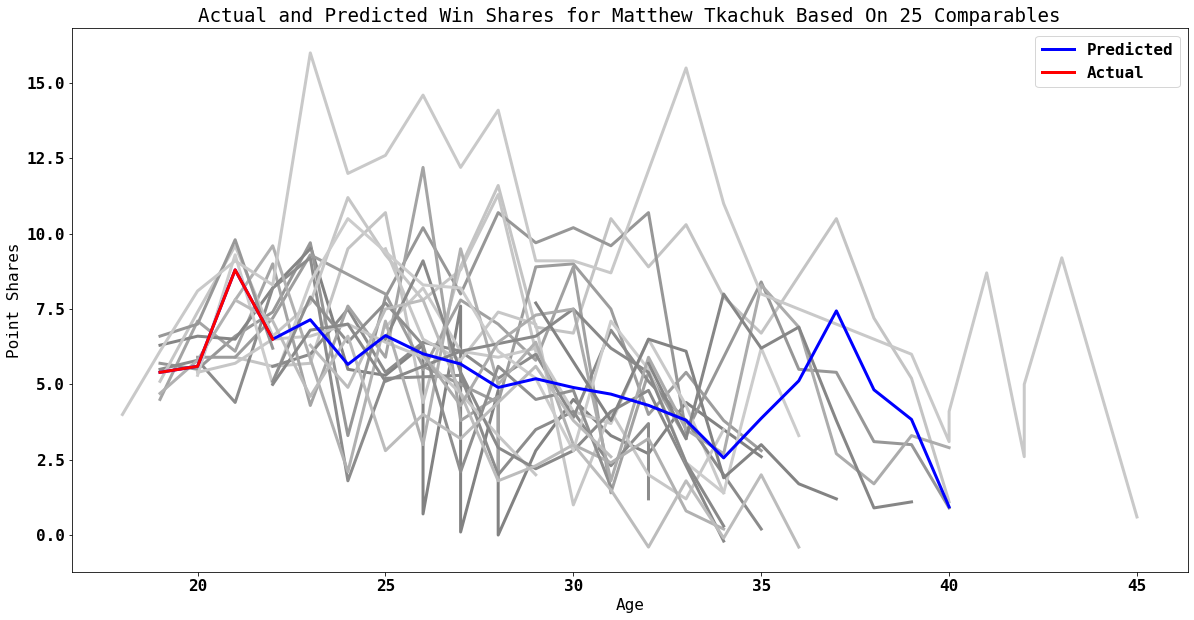

In [16]:
numcomps = 25

simplayerps = pd.DataFrame(columns=["Rk", "Year", "Player", "Age", "PS"])
plt.figure(figsize=(20,10))

font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 16}

plt.rc('font', **font)

for player in allplayersim.head(numcomps).playername:
    pws = winshares.loc[winshares['Player'] == str(player)]
    pws = pws.sort_values(by=['Age'], ascending=True)
    pws = pws.reset_index()
    
    pws = pws[['Year', 'Player', 'Age', 'PS']]
    playername = pws['Player'][0]
    pws = pws.sort_values(by=['Age'], ascending=True)
    
    simscore = allplayersim[allplayersim["playername"] == str(playername)]["simscore"].values[0]
    pws["simscore"] = simscore
    
    simplayerps = simplayerps.append(pws)
    
    x = pws['Age']
    y = pws['PS']
    
    clr = np.random.uniform(low=0.5, high=0.8)
    clrlist = [clr, clr, clr]
    plt.plot(x, y, color=clrlist, linewidth=3)

plt.plot(result['Age'], result['PS'], c="b", label="Predicted".format(poi), linewidth=3)
plt.plot(poiplot['Age'], poiplot['PS'], c="r", label="Actual", linewidth=3)
plt.xlabel('Age')
plt.ylabel('Point Shares')
plt.title('Actual and Predicted Win Shares for {} Based On {} Comparables'.format(str(poi), str(numcomps)))
plt.legend()
plt.show()